----------
<div class="alert alert-success">
    
# Комментарий от наставника

<br>
    
***Марк***, привет!

Меня зовут ***Виноградов Андрей***, я проверил твой проект :)

Хочу отметить, что это, действительно, очень качественная работа, проверять такие работы - одно удовольствие. Видно, что ты постарался.
   
Есть несколько комментариев, но ничего критичного.

Далее в файле мои комментарии ты сможешь найти в ячейках в формате markdown - они будут выделены цветом (<font color='crimson'>красный</font>/<font color='gold'>желтый</font>/<font color='limegreen'>зеленый</font>). 
- <font color='crimson'>Красный цвет</font> - критичное замечание;
- <font color='gold'>Желтый</font> - комментарий общего характера;
- <font color='limegreen'>Зеленый</font> - положительный коммент.


Пострайся учесть эти комментарии в ходе выполнения дальнейших проектов.
</div>

---------

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

<div class="alert alert-success">
    
Очень правильно, что ты в начале работы указываешь ***цель*** исследования.

Это позволяет читателю сразу понять для чего проводится анализ.
</div>

<div class="alert alert-warning">
Правда, также хорошим тоном было бы прилагать информацию о входных данных: какие столбцы есть в таблице и какую информацию они несут. <br>  

*Например,*
    
Описание данных:

- airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
- balcony — число балконов
- ceiling_height — высота потолков (м)
- cityCenters_nearest — расстояние до центра города (м)
- days_exposition — сколько дней было размещено объявление (от публикации до снятия)
- ...
</div>

### Шаг 1. Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t' )
df.info()
display(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


### Вывод

В 13 столбцах содержутся пропуски. В 6 столбцах логично заменить тип данных с вещественного на целочисленный. <br>
Пропуски в столбцах с геоданными объясняются отсутствием в данном районе требуемых объектов. Пропуски в столбце 'first_day_exposition' можно трактовать как факт того, что квартира еще не снята с продажи. Пропуски в столбце 'balcony' - отсутствие балконов в квартире. Пропуски в столбцах 'kitchen_area', 'living_area' и 'ceiling_height' значат, что владельцы жилья не знают этих параметров. Пропуски в столбце 'locality_name' трактуются как неоднозначность в географическом расположении жилья, например, в удаленных местах от населенных пунктов. 

<div class="alert alert-success">
    
Ты отобразил таблицу и изучил данные. Также ты интерпретируешь данные, предполагаешь причины пропусков/ошибок в данных — это очень хорошо :)
</div>

<div class="alert alert-warning">
    
Кстати, для удобного отображения таблицы (чтобы не было переносов столбцов) можно вместо print() использовать display().
</div>

### Шаг 2. Предобработка данных

Заполним пропуски: <br>

В столбцах заполненных автоматически (содержащих географические данные) и в столбце 'balcony' пропуски логично заполнить нулями. <br>
<br>
В столбце, содержащем высоту потолка, пропуски логично зполнить медианным значением, поскольку высота потолков в большинстве квартир лежит в крайне узких границах. В столбце 'locality_name' пропуски заполним значением "неизвестно". <br>
<br>
В столбцах, проблеы в которых невозможно заполнить адекватными данными, потому что мы их не знаем, пропуски логично заполнить нетипичными значениями. <br>
<br>
В столбцах, где это уместно, изменим тип данных на целочисленный.



In [2]:
#удаление столбца
df = df.drop('is_apartment', axis = 1)

#заполнение пропусков нулями
df['balcony'] = df['balcony'].fillna(0)
df['parks_around3000'] = df['parks_around3000'].fillna(0)
df['parks_nearest'] = df['parks_nearest'].fillna(0)
df['ponds_around3000'] = df['ponds_around3000'].fillna(0)
df['ponds_nearest'] = df['ponds_nearest'].fillna(0)
df['airports_nearest'] = df['airports_nearest'].fillna(0)

#заполнение пропусков медианой и строкой
ceil_median = df['ceiling_height'].median()
df['ceiling_height'] = df['ceiling_height'].fillna(ceil_median)
df['locality_name'] = df['locality_name'].fillna('неизвестно')

#заполнение пропусков нетипичными значениями
df['living_area'] = df['living_area'].fillna(-1)
df['kitchen_area'] = df['kitchen_area'].fillna(-1)
df['cityCenters_nearest'] = df['cityCenters_nearest'].fillna(-1)
df['floors_total'] = df['floors_total'].fillna(-1)
df['days_exposition'] = df['days_exposition'].fillna(-1)

#изменение типов данных
df['balcony'] = df['balcony'].astype('int')
df['parks_around3000'] = df['parks_around3000'].astype('int')
df['ponds_around3000'] = df['ponds_around3000'].astype('int')
df['floors_total'] = df['floors_total'].astype('int')
df['days_exposition'] = df['days_exposition'].astype('int')
df['cityCenters_nearest'] = df['cityCenters_nearest'].astype('int')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 21 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          23699 non-null float64
floors_total            23699 non-null int64
living_area             23699 non-null float64
floor                   23699 non-null int64
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            23699 non-null float64
balcony                 23699 non-null int64
locality_name           23699 non-null object
airports_nearest        23699 non-null float64
cityCenters_nearest     23699 non-null int64
parks_around3000        23699 non-null int64
parks_nearest           23699 non-null float64
ponds_around3000        23699 non-null int64
ponds_nearest         

<div class="alert alert-success">
    
Замена пропусков произведена корректно :)
</div>

### Шаг 3. Посчитайте и добавьте в таблицу

Добавим в таблицу требуемые для исследования столбцы:

In [3]:
#цена за м2
df['sqr_m_price'] = df['last_price'] /df['total_area'] 
df['sqr_m_price'] = df['sqr_m_price'].astype('int')

In [4]:
#столбец с датой
df['date'] = pd.to_datetime(df['first_day_exposition'], format = '%Y-%m-%dT%H:%M:%S')

In [5]:
#день недели
df['weekday'] = df['date'].dt.weekday.astype('int')

In [6]:
#классификация  по этажу
def floor_group(row):
    floor = row['floor']
    floor_total = row['floors_total']
    if floor == 1:
        return 'первый'
    if floor == floor_total:
        return 'последний'
    if floor == -1:
        return 'нет данных'
    return 'другое'
    
df['floor_group'] = df.apply(floor_group, axis = 1)    

In [7]:
#соотношение жилой площади к общей
def living_ratio(row):
    living = row['living_area']
    total = row['total_area']
    if living == -1:
        return -1
    return living / total

df['living_ratio'] = df.apply(living_ratio, axis = 1)  

In [8]:
#соотношение кухни к общей площади
def kitchen_ratio(row):
    kitchen = row['living_area']
    total = row['total_area']
    if kitchen == -1:
        return -1
    return kitchen / total

df['kitchen_ratio'] = df.apply(kitchen_ratio, axis = 1)  

In [9]:
#цена в миллионах
df['price_in_millions'] = df['last_price'] / 1000000

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 28 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          23699 non-null float64
floors_total            23699 non-null int64
living_area             23699 non-null float64
floor                   23699 non-null int64
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            23699 non-null float64
balcony                 23699 non-null int64
locality_name           23699 non-null object
airports_nearest        23699 non-null float64
cityCenters_nearest     23699 non-null int64
parks_around3000        23699 non-null int64
parks_nearest           23699 non-null float64
ponds_around3000        23699 non-null int64
ponds_nearest         



<div class="alert alert-success">
    
Корректно и весьма элегантно. Аж проверять приятно :)
</div>

### Шаг 4. Проведите исследовательский анализ данных и выполните инструкции:

#### Изучение площади
<br>

12.0


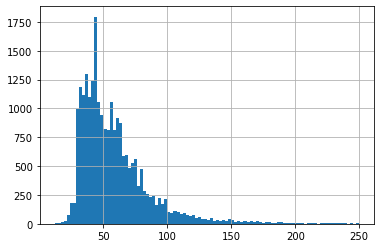

In [11]:
df['total_area'].hist(bins = 100, range = (12, 250))
print(df['total_area'].min())

Основная площадь предствалена небольшими квартирами до 60 квадратов. Большинство значений лежат в районе 40 м2 - площадь стандартной однушки. Выбивающееся значение на графике можно объяснить большим наличием в данных квартир определенной стандартной площади, например однокомнатных хрущевок. 

#### Изучение цены

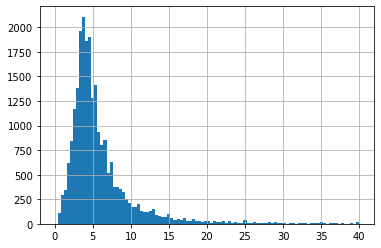

In [12]:
df['price_in_millions'].hist(bins = 100, range = (0, 40))

Гистограмма цен в целом напоминает нормальное распределение с пиком в районе стоимости, равной четырем миллионом. Также имеется длинный "хвост" из значений, больше 25 миллионов.

#### Изучение числа комнат

1     8047
2     7940
3     5814
4     1180
5      326
0      197
6      105
7       59
8       12
9        8
10       3
14       2
11       2
19       1
12       1
16       1
15       1
Name: rooms, dtype: int64


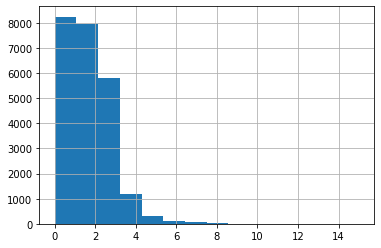

In [13]:
df['rooms'].hist(bins = 14, range = (0, 15))
#df['rooms'].max()
print(df['rooms'].value_counts())

Основное число квартир имеют количество комнат от одной до трех.

#### Изучение высоты потолков

1.0
100.0


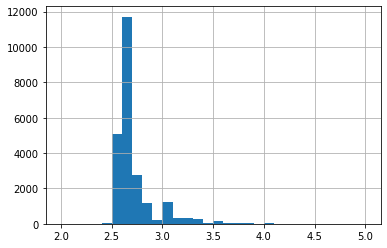

In [14]:
df['ceiling_height'].hist(bins = 30, range = (2, 5))
print(df['ceiling_height'].min())
print(df['ceiling_height'].max())

Выбивающееся значение на графике - следвствие заполнения большого объема данных медианой. большинство значенией высоты потолков лежит в районе от 2,5 до 3 м.

#### Изучение времени продажи

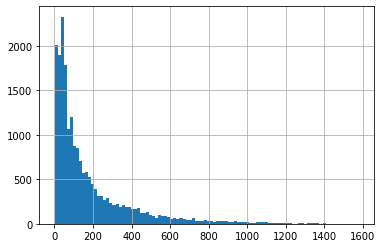

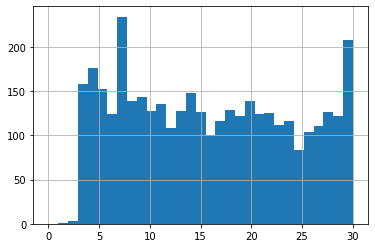

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64


In [15]:
section_1 = df.query('days_exposition != -1')
section_1['days_exposition'].hist(bins = 100)
plt.show()
section_1['days_exposition'].hist(bins = 31, range = (0, 30))
plt.show()
print(section_1['days_exposition'].describe())
#длинные - больше 1000
#короткие - неделя

Большинство квартир продается за время до 250 дней. График имеет длинный "хвост", начиная от 1000 дней. Все, что за этим значением можно считать необычно долгой продажей. Необычно быстрой продажей можно считать продажи, совершенные в период от 0 до 7 дней.

<div class="alert alert-success">
    
Гистограммы построены верно и **выводы** сформированы на основе графиков.
</div>

#### Уберем редкие и выбивающиеся значения по каждому из вышеназванных параметров:

In [16]:
df_clear = df.query('(total_area <= 200) and (price_in_millions <= 25) and (rooms <= 10) and (rooms != 0) and (ceiling_height >= 2) and (ceiling_height <= 4) and (days_exposition <= 1000)')
print('Длина нового датафрейма:',len(df_clear))
print('Процент потерянных данных: {:.2%}'.format(1 - len(df_clear) / len(df)))


Длина нового датафрейма: 22652
Процент потерянных данных: 4.42%


Отсеченные данные составили всего 4.5%, что позволяет удалить их не исказив результат.

<div class="alert alert-success">
    
Согласен, не такой большой процент. Можно пренебречь.
</div>

#### Исследуем зависимость цены от различных параметров

0.78136553666816


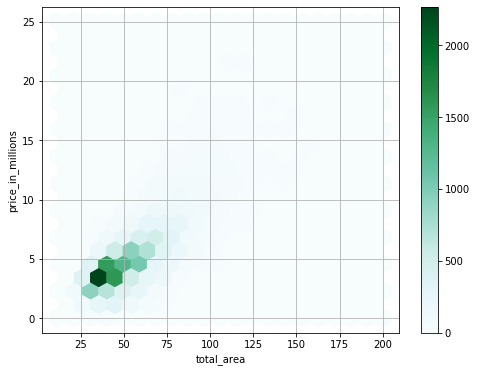

In [17]:
#цена от площади
print(df_clear['total_area'].corr(df_clear['price_in_millions']))
df_clear.plot(x='total_area', y='price_in_millions', kind='hexbin', gridsize=20, figsize=(8, 6), sharex=False, grid=True)

Коэффициент корреляции и график говорят о том, что цена прямопропорционально зависит от площади квартиры. Также видно, что больше всего квартир имеют площадь 30 - 40 квадратов и цену в 4 миллиона. 

0.4977553966800133


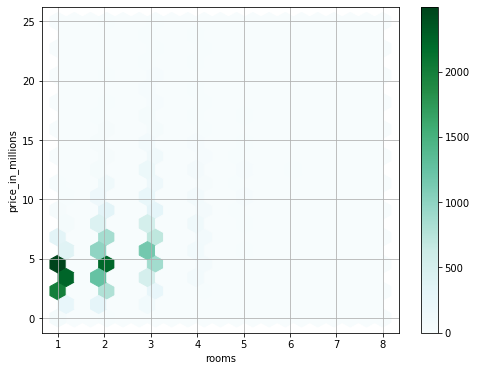

In [18]:
#цена от числа комнат
print(df_clear['rooms'].corr(df_clear['price_in_millions']))
df_clear.plot(x='rooms', y='price_in_millions', kind='hexbin', gridsize=20, figsize=(8, 6), sharex=False, grid=True)

Количество комнат влияет на цену квартры, но не является первоочередным параметром на формирование стоимости. График подтвержает уже выявленные ранее параметры: наибольшую плотность на графике дают квартиры с 1-2 комнатами и ценой 4 -5 миллионов.

<div class="alert alert-success">
    
Хорошее замечание.
</div>

0.12580473151836746


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


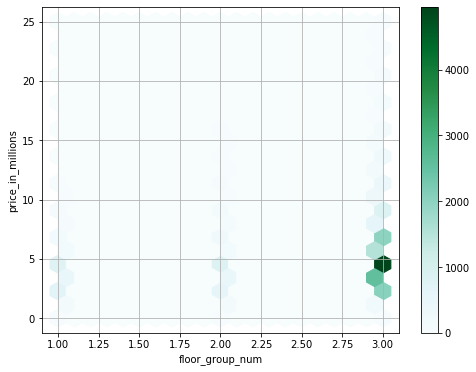

In [19]:
#цена от этажа
#для построения графиков зададим каждой категории номер
def floor_group_num(floor_group):
    if floor_group == 'первый':
        return 1
    if floor_group == 'последний':
        return 2
    if floor_group == 'другое':
        return 3
    return 0

df_clear['floor_group_num'] = df_clear['floor_group'].apply(floor_group_num)
    
print(df_clear['floor_group_num'].corr(df_clear['price_in_millions']))
df_clear.plot(x='floor_group_num', y='price_in_millions', kind='hexbin', gridsize=20, figsize=(8, 6), sharex=False, grid=True)

Зависимоти цены от этажа не выявлено. 

-0.4067546586980961


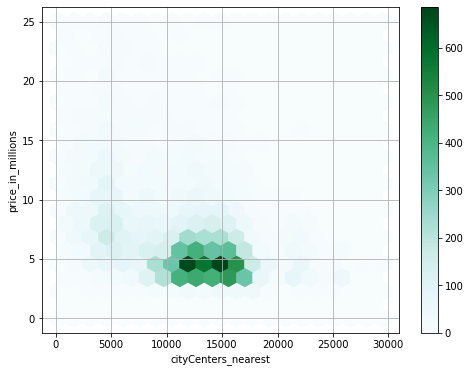

In [20]:
#цена от расстояния до центра
df_clear1 = df_clear.query('(cityCenters_nearest != -1) and (locality_name == "Санкт-Петербург")')
print(df_clear1['cityCenters_nearest'].corr(df_clear['price_in_millions']))
df_clear1.plot(x='cityCenters_nearest', y='price_in_millions', kind='hexbin', gridsize=20, figsize=(8, 6), sharex=False, grid=True)

Большинство изучаемых квартир находятся на расстоянии 10-15 километров от центра. Стоимость этих квартир уверенно занимает ценовой сегмент в 5 млн. Низкая плотность в районе менее 10 км. можно объяснить тем, что квартиры в центре владельцы продают менее охотно. Мы можем увидеть слабую прямую зависимость стоимости от расположения. Расположение - не основной параметр формирования стоимости.  

<div class="alert alert-success">
    
Верно. Кстати, хороший выбор типа графика. Ты мог здесь использовать 'scatter', но 'hexbin' здесь смотрится просто чудесно :)
</div>

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


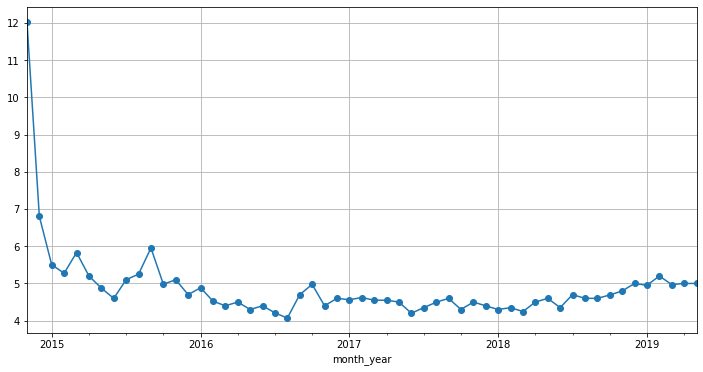

In [21]:
#цена от дня публикации
df_clear['month_year'] = df_clear['date'].dt.month.astype('str') + '-' + df_clear['date'].dt.year.astype('str')
df_clear['month_year'] = pd.to_datetime(df_clear['month_year'], format = '%m-%Y')

(df_clear.groupby('month_year')['price_in_millions']
 .median()
 .plot(style='o-', grid=True, figsize=(12,6))
)

На графике представлены цены на квартиры в течение времени от конца 2015 года до середины 2019. Большой пик в 2015 году объяснятеся малым количеством объявлений этого года в данных. 

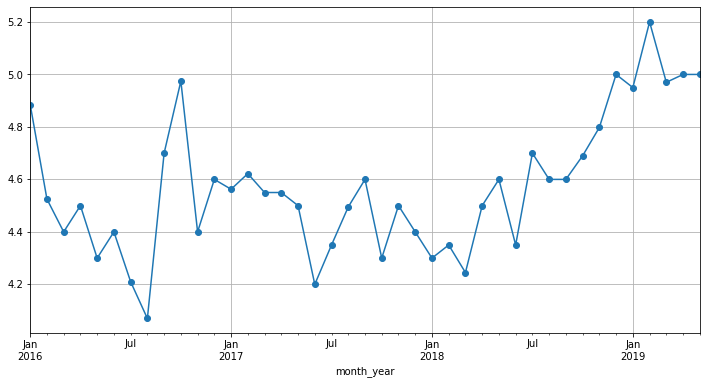

In [22]:
(df_clear.query('date.dt.year > 2015')
 .groupby('month_year')['price_in_millions']
 .median()
 .plot(style='o-', grid=True, figsize=(12,6))
)

Колебания стоимости квартир за исследуемые года лежат в границах 4 -5,2 миллионов. На данные графика опираться не стоит, потому как значение стоимости приведено для квартир с разными значениями площади, комнат и расстоянияот центра. Возможно в какой-то год одних квартир на рынке недвижимости было представлено больше, чем остатьных, и оттого меняется медианное значение цены. 

-0.014666480695163384


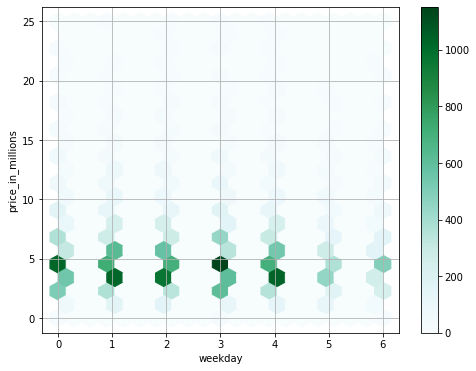

In [23]:
print(df_clear['weekday'].corr(df_clear['price_in_millions']))
df_clear.plot(x='weekday', y='price_in_millions', kind='hexbin', gridsize=20, figsize=(8, 6), sharex=False, grid=True)

Данный график хорошо иллюстрирует привычки людей. В выходные выкладывается меньше объявлений, нежели в будни, так как важными вопросами люди привыкли не заниматься в дни отдыха.

#### Найдем топ-10 городов по количеству объявлений и посчитаем среднюю цену за квадратный метр в них.

In [24]:
locality_stat = df_clear.pivot_table(index = 'locality_name', values = 'sqr_m_price', aggfunc = ['count', 'mean', 'median'])
locality_stat.columns = ['count', 'mean', 'median']
locality_stat = locality_stat.sort_values(by = 'count', ascending = False)
locality_stat['mean'] = locality_stat['mean'].astype('int')
locality_stat['median'] = locality_stat['median'].astype('int')
locality_stat = locality_stat.head(10)
print(locality_stat)

                   count    mean  median
locality_name                           
Санкт-Петербург    14865  109614  103846
посёлок Мурино       489   85186   84375
посёлок Шушары       432   78340   76666
Всеволожск           387   68613   65789
Пушкин               355  102191   99744
Колпино              335   75279   74657
посёлок Парголово    321   90374   91917
Гатчина              306   68757   67860
деревня Кудрово      278   92238   91498
Выборг               235   58072   58108


<div class="alert alert-success">
    
Посчитано верно.
</div>

#### Найдем города с минимальной и максимальной средней стоимостью квартир. 

In [25]:
price_stat = (
    df_clear
    .pivot_table(index = 'locality_name', values = 'price_in_millions', aggfunc = ['count','mean','median'])
)
price_stat.columns = ['count', 'mean', 'median']
price_stat = price_stat.sort_values(by = 'mean', ascending = False)
print(price_stat.head(),'\n')
print(price_stat[price_stat['mean'] == price_stat['mean'].min()])
print(price_stat[price_stat['mean'] == price_stat['mean'].max()])

                         count       mean     median
locality_name                                       
деревня Бор                  2  10.397600  10.397600
посёлок Александровская      2   8.725000   8.725000
посёлок Лисий Нос            1   7.305000   7.305000
посёлок Репино               3   6.889139   5.100000
неизвестно                  49   6.745167   5.130593 

                      count  mean  median
locality_name                            
деревня Вахнова Кара      1  0.45    0.45
               count     mean   median
locality_name                         
деревня Бор        2  10.3976  10.3976


Найденные значения некорректны, так как по данным городам слишком мало количество объявлений. Изучит города, где количество объявлений хотя бы больше 50.

In [26]:
price_stat = price_stat.query('count >= 50')
print(price_stat[price_stat['mean'] == price_stat['mean'].min()])
print(price_stat[price_stat['mean'] == price_stat['mean'].max()])

               count      mean  median
locality_name                         
Сланцы           112  0.873125    0.81
                 count      mean  median
locality_name                           
Санкт-Петербург  14865  6.636053     5.4


Ожидаемо, Питер иметт максимальную среднюю цену на квартиры. 

<div class="alert alert-success">
    
Не могу не согласиться :)
</div>

#### Изучение сегмента квартир в центре

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


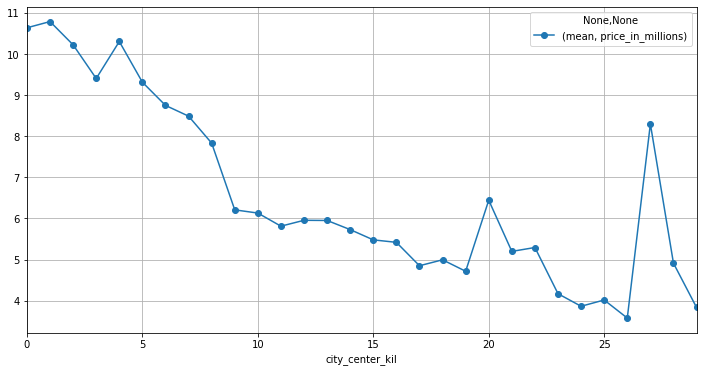

In [27]:
spb = df_clear.query('(locality_name == "Санкт-Петербург") and (cityCenters_nearest != -1)')
spb['city_center_kil'] = spb['cityCenters_nearest'] / 1000
spb['city_center_kil'] = spb['city_center_kil'].astype('int')
spb_pivot = spb.pivot_table(index = 'city_center_kil', values = 'price_in_millions', aggfunc = ['mean'])
spb_pivot.plot(style='o-', grid=True, figsize=(12,6))


Из графика видно, цена на квартиры резко поднимается при расстоянии от центра, равном 9 км. Изучим эту область.

total_area


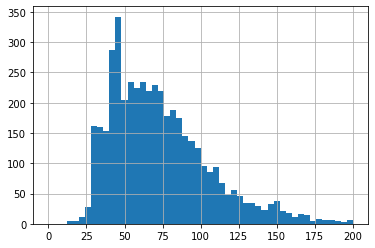

price_in_millions


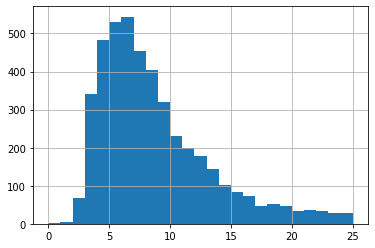

rooms


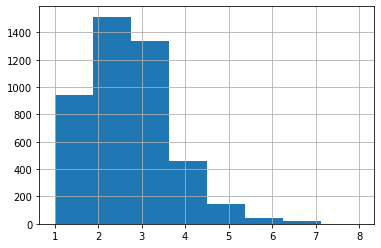

ceiling_height


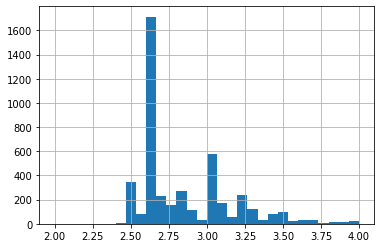

In [28]:
spb_center = spb.query('city_center_kil <=9')
print('total_area')
spb_center['total_area'].hist(bins = 50, range = (0, 200))
plt.show()
print('price_in_millions')
spb_center['price_in_millions'].hist(bins = 25)
plt.show()
print('rooms')
spb_center['rooms'].hist(bins = 8)
plt.show()
print('ceiling_height')
spb_center['ceiling_height'].hist(bins = 30)
plt.show()

В сравнении со всеми данными, квартиры в центре отличаются более высокой ценой. Остальные параметры соответствуют данным по всей таблице. 

<div class="alert alert-success">
    
Буду солидарен :)
</div>

0.5088904619933287


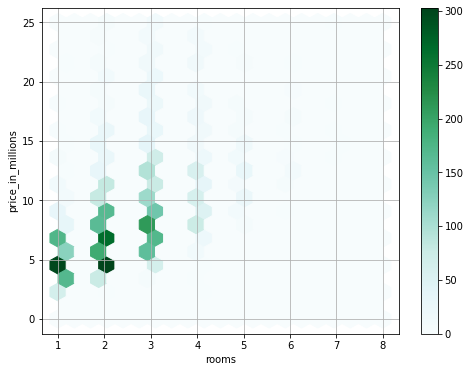

0.12915472605022876


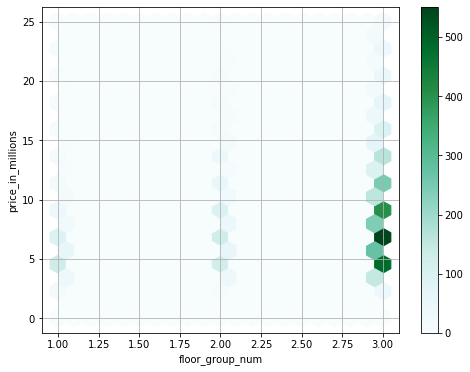

-0.28080781690116213


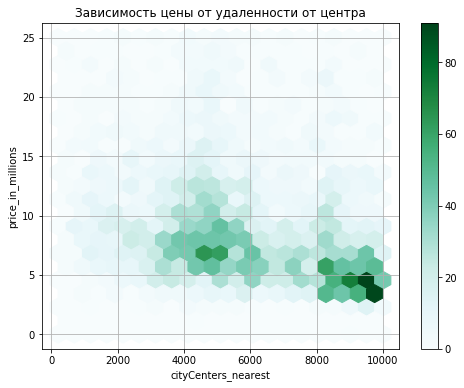

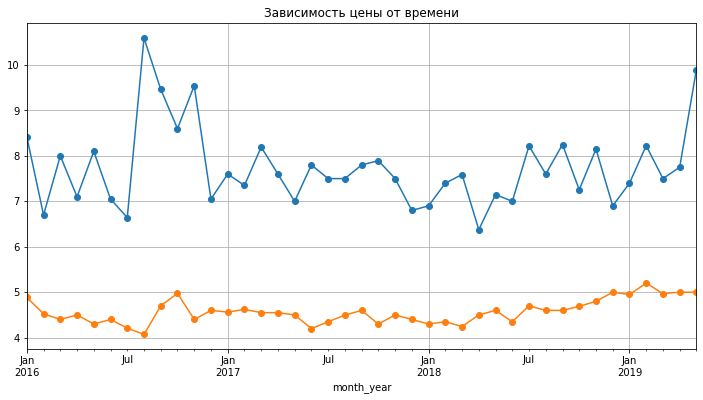

In [29]:
#цена от числа комнат
print(spb_center['rooms'].corr(spb_center['price_in_millions']))
spb_center.plot(x='rooms', y='price_in_millions', kind='hexbin', gridsize=20, figsize=(8, 6), sharex=False, grid=True)
plt.show()

print(spb_center['floor_group_num'].corr(spb_center['price_in_millions']))
spb_center.plot(x='floor_group_num', y='price_in_millions', kind='hexbin', gridsize=20, figsize=(8, 6), sharex=False, grid=True)
plt.show()

print(spb_center['cityCenters_nearest'].corr(df_clear['price_in_millions']))
spb_center.plot(x='cityCenters_nearest', y='price_in_millions', kind='hexbin', title = 'Зависимость цены от удаленности от центра', gridsize=20, figsize=(8, 6), sharex=False, grid=True)
plt.show()

(spb_center.query('date.dt.year >= 2016').groupby('month_year')['price_in_millions']
 .median()
 .plot(style='o-', title = 'Зависимость цены от времени', grid=True, figsize=(12,6))
)
(df_clear.query('date.dt.year > 2015')
 .groupby('month_year')['price_in_millions']
 .median()
 .plot(style='o-', grid=True, figsize=(12,6))
)
plt.show()

От общих данных объявления в центра Питера отличает более высокая цена: 7-8 млн. в сравнении с 4-5 млн. <br>
В целом, значения всех представленных графиков лежат в более высоком сегменте, нежели по всем данным. <br>
Также чуть иначе выглядит зависимость цены от удаленности от центра. Мы видим меньший коэффициент корреляции, так как все рассматриваемые квартиры уже находятся в центре, и расстояния от нулевой точки отсчета имеет все меньшее значение. <br>
Графики зависимости цены от количества комнат и этажа остаются схожими с ранее рассчитанными.


<div class="alert alert-success">
    
В целом, вывод верный, все правильно.
</div>

### Шаг 5. Общий вывод

Данное исследования определило места изученных параметров в формировании стоимости квартиры. Площадь квартиры и ее расположение - основопологающие факторы, в то время как этаж, на котором находится квартира не оказывает особого влияния на ее стоимость. Количество комнат - фактор, влияющий на цену, но не являющийся в этом вопросе первостепенным. <br>
Стоит также учитывать внешние факторы, вияющие на стоимость квартиры, такие как состояние рынка недвижимости. <br>
Сегмент квартир в центре подчиняется тем же законам, хоть и имеет по умолчанию более высокую стартовую стоимсоть. <br>
В добавление, можно заметить, что предложение на рынке недвижимости в основном состоит из типовых квартир небольшой площади в среднем 40 квадратов и 1-2 комнатами. 

<div class="alert alert-success">
    
Вывод соответствует результатам исследования.
</div>

<div class="alert alert-success">

## Комментарий наставника

<br>***Марк***, ты проделал большую работу, молодец! 
    
При проверке твоей работы было пару некритичных комментариев. В остальном - это первоклассная работа. 
Особенно приглянулись графики. Принимаю её :)
    
</div>

### Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод info())
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  посчитано и добавлено в таблицу: цена квадратного метра
- [x]  посчитано и добавлено в таблицу: день недели, месяц и год публикации объявления
- [x]  посчитано и добавлено в таблицу: этаж квартиры; варианты — первый, последний, другой
- [x]  посчитано и добавлено в таблицу: соотношение жилой и общей площади, а также отношение площади кухни к общей
- [x]  изучены следующие параметры: площадь, цена, число комнат, высота потолков
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?"
- [x]  выполнено задание: "Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили."
- [x]  выполнено задание: "Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра. Также изучите зависимость от даты размещения: дня недели, месяца и года. "Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце '*locality_name'*. "
- [x]  выполнено задание: "Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге (*'locality_name'*). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона. "
- [x]  выполнено задание: "Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?"
- [x]  в каждом этапе есть выводы
- [x]  есть общий вывод